In [127]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [27]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [28]:
svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
        ))
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [29]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

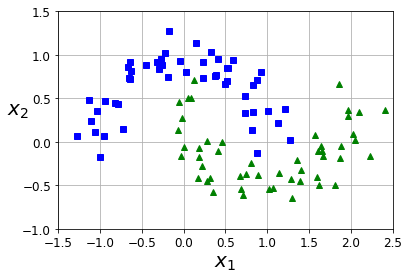

In [33]:
X_moons, y_moons = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

py_svm_clf = Pipeline((
            ("py_features", PolynomialFeatures(degree = 3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C = 10, loss = "hinge"))))

In [35]:
py_svm_clf.fit(X_moons, y_moons)

Pipeline(memory=None,
     steps=[('py_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

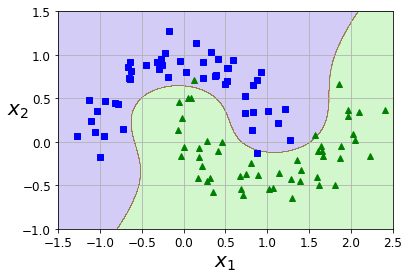

In [51]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(py_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

In [55]:
nx, ny = (5, 3)
x = np.linspace(10, 11, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
X_test = np.c_[xv.ravel(),yv.ravel()]
X_test

array([[10.  ,  0.  ],
       [10.25,  0.  ],
       [10.5 ,  0.  ],
       [10.75,  0.  ],
       [11.  ,  0.  ],
       [10.  ,  0.5 ],
       [10.25,  0.5 ],
       [10.5 ,  0.5 ],
       [10.75,  0.5 ],
       [11.  ,  0.5 ],
       [10.  ,  1.  ],
       [10.25,  1.  ],
       [10.5 ,  1.  ],
       [10.75,  1.  ],
       [11.  ,  1.  ]])

In [61]:
y_pos = py_svm_clf.predict([[1,1]])
y_neg = py_svm_clf.predict([[-0.5,0.5]])
y_pos, y_neg

(array([0], dtype=int64), array([1], dtype=int64))

[-3, 3, -1, 10]

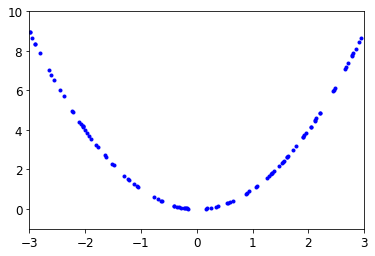

In [74]:
X_poly = 6 * np.random.rand(100, 1) - 3
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_pf = poly_features.fit_transform(X_poly)
plt.plot(X_poly_pf[:,0], X_poly_pf[:, 1], "b.")
plt.axis([-3, 3, -1, 10])

[-3, 3, -2, 2]

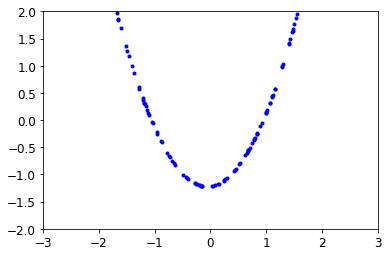

In [78]:
stdscl = StandardScaler()
X_poly_pf = stdscl.fit_transform(X_poly_pf)
plt.plot(X_poly_pf[:,0], X_poly_pf[:, 1], "b.")
plt.axis([-3, 3, -2, 2])

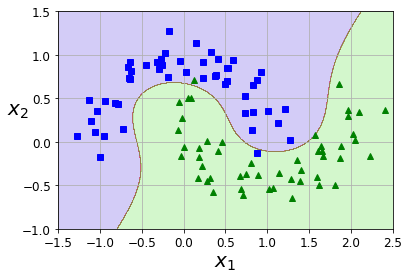

In [95]:
kn_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))))
kn_svm_clf.fit(X_moons, y_moons)
plot_predictions(kn_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

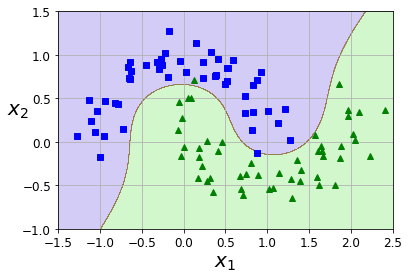

In [100]:
rbf_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel = "rbf", gamma = 0.1, C = 1000))))
rbf_svm_clf.fit(X_moons, y_moons)
plot_predictions(rbf_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

In [123]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    #plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    #plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    #plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.axis(axes)

In [124]:
np.random.seed(42)
m = 50
X_lin = 2 * np.random.rand(m,1)
y_lin = (4 + 3 * X_lin + np.random.rand(m,1)).ravel()

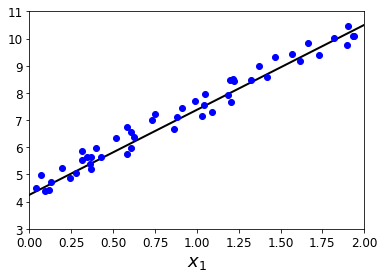

In [125]:
svm_reg = LinearSVR(epsilon = 0.5, random_state=42)
svm_reg.fit(X_lin, y_lin)
plot_svm_regression(svm_reg, X_lin, y_lin, [0, 2, 3, 11])

In [130]:
np.random.seed(42)
m = 100
X_quad = 2 * np.random.rand(m, 1) - 1
y_quad = (0.2 + 0.1 * X_quad + 0.5 * X_quad**2 + np.random.randn(m, 1)/10).ravel()

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


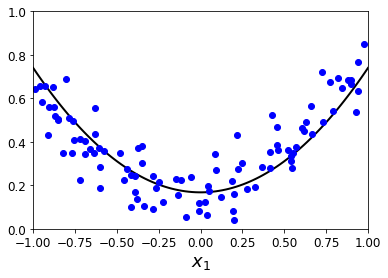

In [134]:
svm_quad_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_quad_reg.fit(X_quad, y_quad)
plot_svm_regression(svm_quad_reg, X_quad, y_quad, [-1, 1, 0, 1])